<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series-Standardization-and-Normalization" data-toc-modified-id="Time-Series-Standardization-and-Normalization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Standardization and Normalization</a></span><ul class="toc-item"><li><span><a href="#Normalization" data-toc-modified-id="Normalization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Standardization</a></span></li></ul></li><li><span><a href="#Now-do-it-in-a-for-loop" data-toc-modified-id="Now-do-it-in-a-for-loop-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Now do it in a for loop</a></span></li></ul></div>

# Time Series Standardization and Normalization
    by Sanket Mehrotra
    Ref: https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

## Normalization
Some TS forecasting and outlier detection methods have better performance when your data has a consistent scale or distribution, e.g. Comparison is easier if all the values of the data are in the range 0,1.

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

Normalization can be useful, and even required in some machine learning algorithms when your time series data has input values with differing scales. It may be required for algorithms, like k-Nearest neighbors, which uses distance calculations and Linear Regression and Artificial Neural Networks that weight input values.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data. **If your time series is trending up or down, estimating these expected values may be difficult and normalization may not be the best method to use on your problem.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("D:/Temp/time-series/data/daily-min-temperatures.csv",index_col=0)

In [23]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [26]:
#df['Date']= pd.to_datetime(df['Date']) 

In [27]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [28]:
len(df)

3650

In [30]:
values = df.values
values = values.reshape(-1,1)

Good practice usage with the MinMaxScaler and other rescaling techniques is as follows:

Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function,


Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function


Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.

If needed, the transform can be inverted. This is useful for converting predictions back into their original scale for reporting or plotting. This can be done by calling the inverse_transform() function.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)

In [42]:
series = pd.read_csv("D:/Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv")
series.head()

,timestamp,value,is_anomaly
0,1416726000,13.894031,0
1,1416729600,33.578274,0
2,1416733200,88.933746,0
3,1416736800,125.389424,0
4,1416740400,152.962000,0


In [43]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')
series = series.set_index('timestamp')

In [47]:
vals = series.copy()#pd.DataFrame(series['value'])
vals

,value,is_anomaly
timestamp,,
2014-11-23 07:00:00,13.894031,0
2014-11-23 08:00:00,33.578274,0
2014-11-23 09:00:00,88.933746,0
2014-11-23 10:00:00,125.389424,0
2014-11-23 11:00:00,152.962000,0
...,...,...
2015-01-21 07:00:00,-141.419766,0
2015-01-21 08:00:00,-139.657834,0
2015-01-21 09:00:00,-70.550652,0


In [48]:
vals = vals.drop(columns=['is_anomaly'],axis=1)

vals

,value
timestamp,
2014-11-23 07:00:00,13.894031
2014-11-23 08:00:00,33.578274
2014-11-23 09:00:00,88.933746
2014-11-23 10:00:00,125.389424
2014-11-23 11:00:00,152.962000
...,...
2015-01-21 07:00:00,-141.419766
2015-01-21 08:00:00,-139.657834
2015-01-21 09:00:00,-70.550652


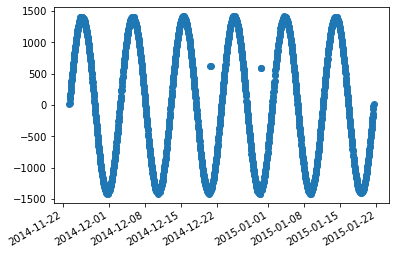

In [65]:
plt.plot_date(vals.index,vals.value)
plt.gcf().autofmt_xdate()

In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(vals)

In [62]:
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: -1421.039008, Max: 1416.912543


In [63]:
normalized = scaler.transform(vals)
for i in range(5):
	print(normalized[i])

[0.50562281]
[0.51255888]
[0.53206432]
[0.54491009]
[0.55462575]


In [64]:
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

[13.8940312]
[33.57827355]
[88.93374618]
[125.3894237]
[152.96199964]


## Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your time series data if this expectation is not met, but you may not get reliable results.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

In [71]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [72]:
series

,value,is_anomaly
timestamp,,
2014-11-23 07:00:00,13.894031,0
2014-11-23 08:00:00,33.578274,0
2014-11-23 09:00:00,88.933746,0
2014-11-23 10:00:00,125.389424,0
2014-11-23 11:00:00,152.962000,0
...,...,...
2015-01-21 07:00:00,-141.419766,0
2015-01-21 08:00:00,-139.657834,0
2015-01-21 09:00:00,-70.550652,0


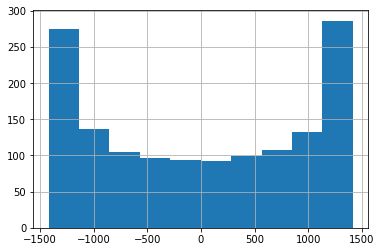

In [73]:
series.value.hist()
plt.show()

In [74]:
# prepare data for standardization
values = series.copy()
values = values.drop(columns=['is_anomaly'],axis=1)
#values = values.reshape((len(values), 1))

# train the standardization
scaler2 = StandardScaler()
scaler2 = scaler2.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
# standardization the dataset and print the first 5 rows
standardaized = scaler2.transform(values)
for i in range(5):
    print(standardaized[i])

# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(standardaized)
for i in range(5):
    print(inversed[i])

Mean: 6.368346, StandardDeviation: 987.420584
[0.00762156]
[0.02755657]
[0.08361726]
[0.12053737]
[0.14846121]
[-1399.40939004]
[-1342.83478851]
[-1183.73728543]
[-1078.95979926]
[-999.71328981]


# Now do it in a for loop

In [ ]:
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')

In [ ]:
series = pd.read_csv("D:/Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv")
series.head()

# Set the datetime as index and convert from unix time to human readable datetime
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')
series = series.set_index('timestamp')

# pick out values for normalization
vals = series.copy()#pd.DataFrame(series['value'])
vals = vals.drop(columns=['is_anomaly'],axis=1)

print(vals)

#Normalize - train
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(vals)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

#Test transform and inverse transform.
print(vals.value.head())

normalized = scaler.transform(vals)
for i in range(5):
	print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

##STANDASRDIZATION

# prepare data for standardization
values = series.copy()
values = values.drop(columns=['is_anomaly'],axis=1)
#values = values.reshape((len(values), 1))

# train the standardization
scaler2 = StandardScaler()
scaler2 = scaler2.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
# standardization the dataset and print the first 5 rows
standardaized = scaler2.transform(values)
for i in range(5):
	print(standardaized[i])

# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(standardaized)
for i in range(5):
	print(inversed[i])

plt.gcf().set_size_inches(10,10)
plt.subplot(4,1,1)
series.value.hist()
plt.subplot(4,1,2)
plt.plot_date(vals.index,vals.value)
plt.gcf().autofmt_xdate()
plt.subplot(4,1,3)
plt.plot_date(vals.index,normalized)
plt.gcf().autofmt_xdate()
plt.subplot(4,1,4)
plt.plot_date(vals.index,standardaized)
plt.gcf().autofmt_xdate()